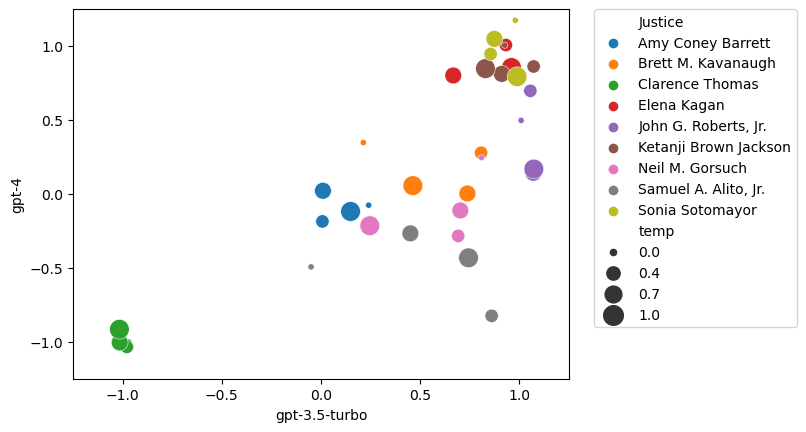

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data into a DataFrame
df = pd.read_csv('all-scores-6-spins.csv')

# Pivot the data so that each model is a separate column
pivot_df = df.pivot_table(index=['Justice', 'temp'], columns='model', values='final').reset_index()

# Add more jitter to the 'gpt-3.5-turbo' and 'gpt-4' columns
stdev = 0.05  # Increase standard deviation for more jitter
pivot_df['gpt-3.5-turbo'] += np.random.randn(len(pivot_df['gpt-3.5-turbo'])) * stdev
pivot_df['gpt-4'] += np.random.randn(len(pivot_df['gpt-4'])) * stdev

# Create a scatter plot with point size based on 'temp'
sns.scatterplot(data=pivot_df, x='gpt-3.5-turbo', y='gpt-4', hue='Justice', size='temp', sizes=(20, 200))

# Set the x and y limits
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)

# Move the legend to the right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()